<a href="https://colab.research.google.com/github/imbikramsaha/Oxford-IIIT-Pets/blob/main/Oxford_pets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import torch
from fastai import *
from fastai.basics import *
from fastai.callback.all import *
from fastai.metrics import error_rate, accuracy
from fastai.vision import *
from fastai.vision.all import *
from fastai.basics import *
import numpy as np
import pandas as pd
import matplotlib as mlt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
path = untar_data(URLs.PETS)

In [5]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [6]:
files = get_image_files(path/"images")
len(files)

7390

In [7]:
pat = r'^(.*)_\d+.jpg'

In [8]:
data = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

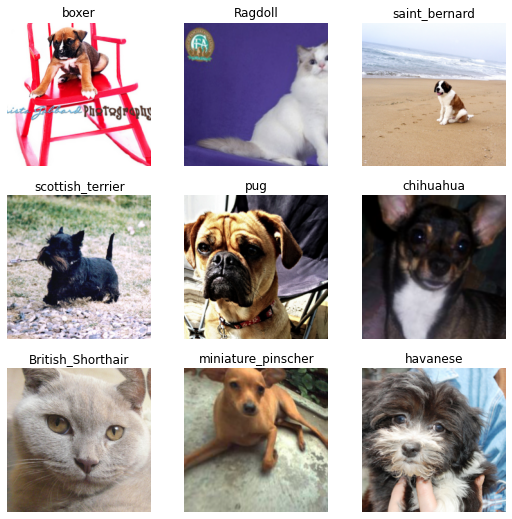

In [9]:
data.show_batch()

In [11]:
learn = cnn_learner(data, resnet152, metrics=accuracy)

In [12]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

SuggestedLRs(valley=0.0004786300996784121)

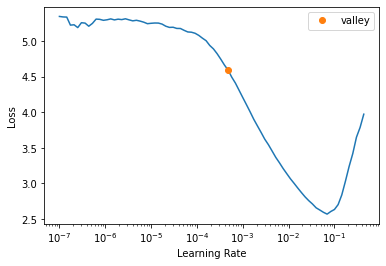

In [13]:
learn.lr_find()

In [14]:
learn.fine_tune(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.755390,0.273810,0.915426,02:18


epoch,train_loss,valid_loss,accuracy,time
0,0.391515,0.365397,0.895129,02:59
1,0.435119,0.459944,0.864005,02:58
2,0.288067,0.234245,0.940460,02:58
3,0.135213,0.164534,0.953992,02:58
4,0.078002,0.161659,0.952639,02:58


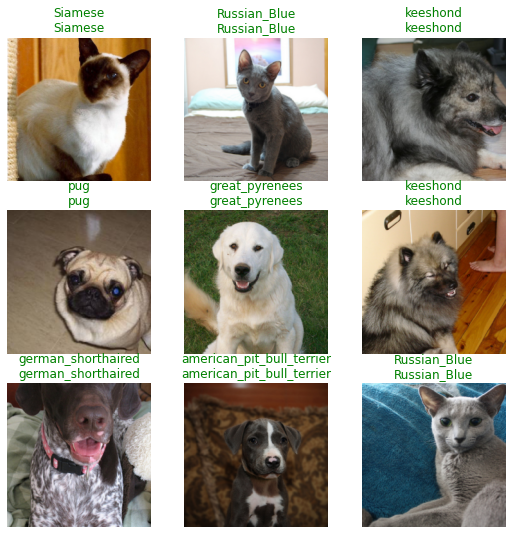

In [15]:
learn.show_results()

In [16]:
interp = Interpretation.from_learner(learn)

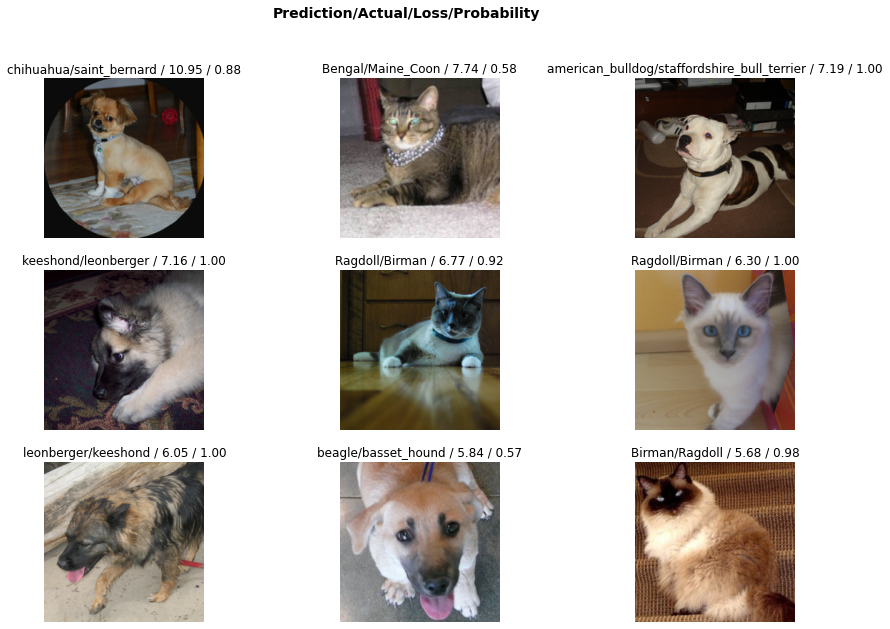

In [17]:
interp.plot_top_losses(9, figsize=(15,10))